<a href="https://colab.research.google.com/github/Koyac/Image100knocks1/blob/restart/Image100knocks3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://github.com/yoyoyo-yo/Gasyori100knock

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


threshold >> 127


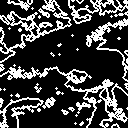

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Gray scale
def BGR2GRAY(img):
	b = img[:, :, 0].copy()
	g = img[:, :, 1].copy()
	r = img[:, :, 2].copy()

	# Gray scale
	out = 0.2126 * r + 0.7152 * g + 0.0722 * b
	out = out.astype(np.uint8)

	return out

# Otsu Binalization
def otsu_binarization(img, th=128):
	H, W = img.shape
	out = img.copy()

	max_sigma = 0
	max_t = 0

	# determine threshold
	for _t in range(1, 255):
		v0 = out[np.where(out < _t)]
		m0 = np.mean(v0) if len(v0) > 0 else 0.
		w0 = len(v0) / (H * W)
		v1 = out[np.where(out >= _t)]
		m1 = np.mean(v1) if len(v1) > 0 else 0.
		w1 = len(v1) / (H * W)
		sigma = w0 * w1 * ((m0 - m1) ** 2)
		if sigma > max_sigma:
			max_sigma = sigma
			max_t = _t

	# Binarization
	print("threshold >>", max_t)
	th = max_t
	out[out < th] = 0
	out[out >= th] = 255

	return out


# Erosion
def Erode(img, Erode_time=1):
	H, W = img.shape
	out = img.copy()

	# kernel
	MF = np.array(((0, 1, 0),
				(1, 0, 1),
				(0, 1, 0)), dtype=np.int)

	# each erode
	for i in range(Erode_time):
		tmp = np.pad(out, (1, 1), 'edge')
		# erode
		for y in range(1, H+1):
			for x in range(1, W+1):
				if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
					out[y-1, x-1] = 0

	return out


# Dilation
def Dilate(img, Dil_time=1):
	H, W = img.shape

	# kernel
	MF = np.array(((0, 1, 0),
				(1, 0, 1),
				(0, 1, 0)), dtype=np.int)

	# each dilate time
	out = img.copy()
	for i in range(Dil_time):
		tmp = np.pad(out, (1, 1), 'edge')
		for y in range(1, H+1):
			for x in range(1, W+1):
				if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
					out[y-1, x-1] = 255

	return out


# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# Grayscale
gray = BGR2GRAY(img)

# Otsu's binarization
otsu = otsu_binarization(gray)

# Erode image
eroded = Erode(otsu)

# Delate image
dilated = Dilate(otsu)

# Morphology
out = np.abs(eroded - dilated) * 255
                
# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

threshold >> 127


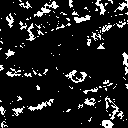

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Gray scale
def BGR2GRAY(img):
	b = img[:, :, 0].copy()
	g = img[:, :, 1].copy()
	r = img[:, :, 2].copy()

	# Gray scale
	out = 0.2126 * r + 0.7152 * g + 0.0722 * b
	out = out.astype(np.uint8)

	return out

# Otsu Binalization
def otsu_binarization(img, th=128):
	H, W = img.shape
	out = img.copy()

	max_sigma = 0
	max_t = 0

	# determine threshold
	for _t in range(1, 255):
		v0 = out[np.where(out < _t)]
		m0 = np.mean(v0) if len(v0) > 0 else 0.
		w0 = len(v0) / (H * W)
		v1 = out[np.where(out >= _t)]
		m1 = np.mean(v1) if len(v1) > 0 else 0.
		w1 = len(v1) / (H * W)
		sigma = w0 * w1 * ((m0 - m1) ** 2)
		if sigma > max_sigma:
			max_sigma = sigma
			max_t = _t

	# Binarization
	print("threshold >>", max_t)
	th = max_t
	out[out < th] = 0
	out[out >= th] = 255

	return out


# Erosion
def Erode(img, Erode_time=1):
	H, W = img.shape
	out = img.copy()

	# kernel
	MF = np.array(((0, 1, 0),
				(1, 0, 1),
				(0, 1, 0)), dtype=np.int)

	# each erode
	for i in range(Erode_time):
		tmp = np.pad(out, (1, 1), 'edge')
		# erode
		for y in range(1, H+1):
			for x in range(1, W+1):
				if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
					out[y-1, x-1] = 0

	return out


# Dilation
def Dilate(img, Dil_time=1):
	H, W = img.shape

	# kernel
	MF = np.array(((0, 1, 0),
				(1, 0, 1),
				(0, 1, 0)), dtype=np.int)

	# each dilate time
	out = img.copy()
	for i in range(Dil_time):
		tmp = np.pad(out, (1, 1), 'edge')
		for y in range(1, H+1):
			for x in range(1, W+1):
				if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
					out[y-1, x-1] = 255

	return out

# Opening morphology
def Morphology_Opening(img, time=1):
    dil = Dilate(img, Dil_time=time)
    erode = Erode(dil, Erode_time=time)
    return erode

# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# Grayscale
gray = BGR2GRAY(img)

# Otsu's binarization
otsu = otsu_binarization(gray)

# Opening process
opened = Morphology_Opening(otsu, time=3)

# Tophat
out = np.abs(otsu - opened) * 255
                
# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow( out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Gray scale
def BGR2GRAY(img):
	b = img[:, :, 0].copy()
	g = img[:, :, 1].copy()
	r = img[:, :, 2].copy()

	# Gray scale
	out = 0.2126 * r + 0.7152 * g + 0.0722 * b
	out = out.astype(np.uint8)

	return out

# Otsu Binalization
def otsu_binarization(img, th=128):
	H, W = img.shape
	out = img.copy()

	max_sigma = 0
	max_t = 0

	# determine threshold
	for _t in range(1, 255):
		v0 = out[np.where(out < _t)]
		m0 = np.mean(v0) if len(v0) > 0 else 0.
		w0 = len(v0) / (H * W)
		v1 = out[np.where(out >= _t)]
		m1 = np.mean(v1) if len(v1) > 0 else 0.
		w1 = len(v1) / (H * W)
		sigma = w0 * w1 * ((m0 - m1) ** 2)
		if sigma > max_sigma:
			max_sigma = sigma
			max_t = _t

	# Binarization
	print("threshold >>", max_t)
	th = max_t
	out[out < th] = 0
	out[out >= th] = 255

	return out


# Erosion
def Erode(img, Erode_time=1):
	H, W = img.shape
	out = img.copy()

	# kernel
	MF = np.array(((0, 1, 0),
				(1, 0, 1),
				(0, 1, 0)), dtype=np.int)

	# each erode
	for i in range(Erode_time):
		tmp = np.pad(out, (1, 1), 'edge')
		# erode
		for y in range(1, H+1):
			for x in range(1, W+1):
				if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
					out[y-1, x-1] = 0

	return out


# Dilation
def Dilate(img, Dil_time=1):
	H, W = img.shape

	# kernel
	MF = np.array(((0, 1, 0),
				(1, 0, 1),
				(0, 1, 0)), dtype=np.int)

	# each dilate time
	out = img.copy()
	for i in range(Dil_time):
		tmp = np.pad(out, (1, 1), 'edge')
		for y in range(1, H+1):
			for x in range(1, W+1):
				if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
					out[y-1, x-1] = 255

	return out

def Morphology_Closing(img,time=1):
  erode = Erode(img,Erode_time=time)
  dil = Dilate(erode,Dil_time=time)
  return erode

img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

gray = BGR2GRAY(img)

otsu = otsu_binarization(gray)

opened = Morphology_Closing(otsu,time=3)
out = np.abs(opened - otsu) * 255

cv2.imwrite('out.jpg',out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# template matching
def Template_matching(img, template):
    # get original image shape
    H, W, C = img.shape

    # get template image shape
    Ht, Wt, Ct = template.shape

    # Templete matching
    # prepare x, y index
    i, j = -1, -1
    # prepare evaluate value
    v = 255 * H * W * C

    for y in range(H - Ht):
        for x in range(W - Wt):
            # get SAD value
            _v = np.sum(np.abs(img[y : y + Ht, x : x + Wt] - template))

            # if SAD is min
            if _v < v:
                v = _v
                i, j = x, y

    out = img.copy()
    # draw rectangle
    cv2.rectangle(out, pt1=(i, j), pt2=(i+Wt, j+Ht), color=(0,0,255), thickness=1)
    out = out.astype(np.uint8)

    return out

# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# Read templete image
template = cv2.imread("imori_part.jpg").astype(np.float32)

# Template matching
out = Template_matching(img, template)

                
# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# template matching
def Template_matching(img, template):
    # get original image shape
    H, W, C = img.shape

    # get template image shape
    Ht, Wt, Ct = template.shape
    i, j = -1, -1
    # prepare evaluate value
    v = -1

    for y in range(H - Ht):
        for x in range(W - Wt):
            _v = np.sum(img[y : y + Ht, x : x + Wt] * template)
            # devided numerator
            _v /= (np.sqrt(np.sum(img[y : y + Ht, x : x + Wt] ** 2)) * np.sqrt(np.sum(template ** 2)))

            # if NCC is max
            if _v > v:
                v = _v
                i, j = x, y

    out = img.copy()
    # draw rectangle
    cv2.rectangle(out, pt1=(i, j), pt2=(i+Wt, j+Ht), color=(0,0,255), thickness=1)
    out = out.astype(np.uint8)

    return out

img = cv2.imread("imori.jpg").astype(np.float32)

# Read templete image
template = cv2.imread("imori_part.jpg").astype(np.float32)

# Template matching
out = Template_matching(img, template)
                
# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# template matching
def Template_matching(img, template):
    # get original image shape
    H, W, C = img.shape

    # subtract mean BGR
    _img = img - np.mean(img, axis=(0, 1))

    # get template image shape
    Ht, Wt, Ct = template.shape

    # subtract mean BGR
    _template = template - np.mean(img, axis=(0, 1))

    # Templete matching
    # prepare x, y index
    i, j = -1, -1
    # prepare evaluate value
    v = -1

    for y in range(H - Ht):
        for x in range(W - Wt):
            # get ZNCC value
            # get numerator of ZNCC
            _v = np.sum(_img[y : y + Ht, x : x + Wt] * _template)
            # devided numerator
            _v /= (np.sqrt(np.sum(_img[y : y + Ht, x : x + Wt] ** 2)) * np.sqrt(np.sum(template ** 2)))

            # if ZNCC is max
            if _v > v:
                v = _v
                i, j = x, y

    out = img.copy()
    # draw rectangle
    cv2.rectangle(out, pt1=(i, j), pt2=(i+Wt, j+Ht), color=(0,0,255), thickness=1)
    out = out.astype(np.uint8)

    return out

# Read image
img = cv2.imread("imori.jpg").astype(np.float32)

# Read templete image
template = cv2.imread("imori_part.jpg").astype(np.float32)

# Template matching
out = Template_matching(img, template)


# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# labeling 4 nearest neighbor
def labeling_4nn(img):
    # get image shape
    H, W, C = img.shape

    # prepare label tempolary image
    label = np.zeros((H, W), dtype=np.int)
    label[img[..., 0]>0] = 1

    # look up table
    LUT = [0 for _ in range(H*W)]

    n = 1

    for y in range(H):
        for x in range(W):
            # skip black pixel
            if label[y, x] == 0:
                continue
            
            # get above pixel
            c3 = label[max(y-1,0), x]

            # get left pixel
            c5 = label[y, max(x-1,0)]

            # if not labeled
            if c3 < 2 and c5 < 2:
                # labeling
                n += 1
                label[y, x] = n
            else:
                # replace min label index
                _vs = [c3, c5]
                vs = [a for a in _vs if a > 1]
                v = min(vs)
                label[y, x] = v
                
                minv = v
                for _v in vs:
                    if LUT[_v] != 0:
                        minv = min(minv, LUT[_v])
                for _v in vs:
                    LUT[_v] = minv
                    
    count = 1

    # integrate index of look up table
    for l in range(2, n+1):
        flag = True
        for i in range(n+1):
            if LUT[i] == l:
                if flag:
                    count += 1
                    flag = False
                LUT[i] = count

    # draw color
    COLORS = [[0, 0, 255], [0, 255, 0], [255, 0, 0], [255, 255, 0]]
    out = np.zeros((H, W, C), dtype=np.uint8)

    for i, lut in enumerate(LUT[2:]):
        out[label == (i+2)] = COLORS[lut-2]

    return out
    

# Read image
img = cv2.imread("seg.png").astype(np.float32)

# labeling 4 nearest neighbor
out = labeling_4nn(img)

# Save result
cv2.imwrite("out.png", out)
cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# labeling 8 nearest neighbor
def labeling_8nn(img):
    # get image shape
    H, W, C = img.shape

    # prepare labeling image
    label = np.zeros((H, W), dtype=np.int)
    label[img[..., 0]>0] = 1

    # look up table
    LUT = [0 for _ in range(H*W)]

    n = 1

    for y in range(H):
        for x in range(W):
            if label[y, x] == 0:
                continue
            # get right top pixel
            c2 = label[max(y-1,0), min(x+1, W-1)]
            # get top pixel
            c3 = label[max(y-1,0), x]
            # get left top pixel
            c4 = label[max(y-1,0), max(x-1,0)]
            # get left pixel
            c5 = label[y, max(x-1,0)]

            # if all pixel is non labeled
            if c3 < 2 and c5 < 2 and c2 < 2 and c4 < 2:
                n += 1
                label[y, x] = n
            else:
                # get labeled index
                _vs = [c3, c5, c2, c4]
                vs = [a for a in _vs if a > 1]
                v = min(vs)
                label[y, x] = v

                minv = v
                for _v in vs:
                    if LUT[_v] != 0:
                        minv = min(minv, LUT[_v])
                for _v in vs:
                    LUT[_v] = minv
                    
    count = 1

    # integrate labeled index of look up table
    for l in range(2, n+1):
        flag = True
        for i in range(n+1):
            if LUT[i] == l:
                if flag:
                    count += 1
                    flag = False
                LUT[i] = count

    # draw color
    COLORS = [[0, 0, 255], [0, 255, 0], [255, 0, 0], [255, 255, 0]]
    out = np.zeros((H, W, C), dtype=np.uint8)

    for i, lut in enumerate(LUT[2:]):
        out[label == (i+2)] = COLORS[lut-2]

    return out
    

# Read image
img = cv2.imread("seg.png").astype(np.float32)

# labeling 8 nearest neighbor
out = labeling_8nn(img)

# Save result
cv2.imwrite("out.png", out)
cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def alpha_blend(img1,img2,alpha):
  out = img*alpha+img2*(1-alpha)
  out = out.astype(np.uint8)
  return out

# Read image
img = cv2.imread("imori.jpg").astype(np.float32)

# Read blend target image
img2 = cv2.imread("thorino.jpg").astype(np.float32)

out = alpha_blend(img,img2,0.6)

cv2.imwrite('out.jpg',out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destoryAllWindows()

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

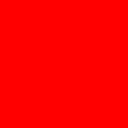

In [4]:
def connect_4(img):
  H,W,C = img.shape
  tmp = np.zeros((H,W), dtype=np.int)
  tmp[img[...,0]>0] = 1
  out = np.zeros((H,W,3),dtype=np.uint8)
  for y in range(H):
    for x in range(W):
      if tmp[y,x] < 1:
        continue

      S = 0
      S += (tmp[y,min(x+1,W-1)] - tmp[y,min(x+1,W-1)] * tmp[max(y-1,0),min(x+1,W-1)] * tmp[max(y-1,0),x])
      S += (tmp[max(y-1,0),x] - tmp[max(y-1,0),x] * tmp[max(y-1,0),max(x-1,0)] * tmp[y,max(x-1,0)])
      S += (tmp[y,max(x-1,0)] - tmp[y,max(x-1,0)] * tmp[min(y+1,H-1),max(x-1,0)] * tmp[min(y+1,H-1),x])
      S += (tmp[min(y+1,H-1),x] - tmp[min(y+1,H-1),x] * tmp[min(y+1,H-1),min(x+1,W-1)] * tmp[y,min(x+1,W-1)])

      if S == 0:
        out[y,x] = [0,0,255]
      elif S == 1:
        out[y,x] = [0,255,0]
      elif S == 2:
        out[y,x] = [255,0,0]
      elif S == 3:
        out[y,x] = [255, 255, 0]
      elif S == 4:
        out[y,x] = [255, 0, 255]

  out = out.astype(np.uint8)

  return out

img = cv2.imread('/content/drive/MyDrive/assets/imori.jpg').astype(np.float32)

out = connect_4(img)

cv2.imwrite('out.jpg',out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# connect 8
def connect_8(img):
    # get shape
    H, W, C = img.shape

    # prepare temporary
    _tmp = np.zeros((H, W), dtype=np.int)

    # get binarize
    _tmp[img[..., 0] > 0] = 1

    # inverse for connect 8
    tmp = 1 - _tmp

    # prepare image
    out = np.zeros((H, W, 3), dtype=np.uint8)

    # each pixel
    for y in range(H):
        for x in range(W):
            if _tmp[y, x] < 1:
                continue

            S = 0
            S += (tmp[y,min(x+1,W-1)] - tmp[y,min(x+1,W-1)] * tmp[max(y-1,0),min(x+1,W-1)] * tmp[max(y-1,0),x])
            S += (tmp[max(y-1,0),x] - tmp[max(y-1,0),x] * tmp[max(y-1,0),max(x-1,0)] * tmp[y,max(x-1,0)])
            S += (tmp[y,max(x-1,0)] - tmp[y,max(x-1,0)] * tmp[min(y+1,H-1),max(x-1,0)] * tmp[min(y+1,H-1),x])
            S += (tmp[min(y+1,H-1),x] - tmp[min(y+1,H-1),x] * tmp[min(y+1,H-1),min(x+1,W-1)] * tmp[y,min(x+1,W-1)])
            
            if S == 0:
                out[y,x] = [0, 0, 255]
            elif S == 1:
                out[y,x] = [0, 255, 0]
            elif S == 2:
                out[y,x] = [255, 0, 0]
            elif S == 3:
                out[y,x] = [255, 255, 0]
            elif S == 4:
                out[y,x] = [255, 0, 255]
                    
    out = out.astype(np.uint8)

    return out


# Read image
img = cv2.imread("renketsu.png").astype(np.float32)

# connect 8
out = connect_8(img)


# Save result
cv2.imwrite("out.png", out)
cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()


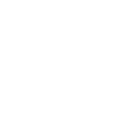

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def thining(img):
  H,W,C = img.shape
  out = np.zeros((H,W),dtype=np.int)
  out[img[...,0]>0] = 1

  count = 1
  while count > 0:
    count = 0
    tmp = out.copy()
    for y in range(H):
      for x in range(W):
        if out[y,x] < 1:
          continue

        judge = 0

        if (tmp[y, min(x+1, W-1)] + tmp[max(y-1, 0), x] + tmp[y, max(x-1, 0)] + tmp[min(y+1, H-1), x]) < 4:
          judge += 1

        c = 0
        c += (tmp[y,min(x+1, W-1)] - tmp[y, min(x+1, W-1)] * tmp[max(y-1, 0),min(x+1, W-1)] * tmp[max(y-1, 0), x])
        c += (tmp[max(y-1,0), x] - tmp[max(y-1,0), x] * tmp[max(y-1, 0), max(x-1, 0)] * tmp[y, max(x-1, 0)])
        c += (tmp[y, max(x-1, 0)] - tmp[y,max(x-1, 0)] * tmp[min(y+1, H-1), max(x-1, 0)] * tmp[min(y+1, H-1), x])
        c += (tmp[min(y+1, H-1), x] - tmp[min(y+1, H-1), x] * tmp[min(y+1, H-1), min(x+1, W-1)] * tmp[y, min(x+1, W-1)])
        if x == 1:
          judge += 1
        
        if np.sum(tmp[max(y-1,0) : min(y+2,H),max(x-1,0): min(x+2,W)]) >= 4:
          judge += 1

        if judge == 3:
          out[y,x] = 0
          count += 1

  out = out.astype(np.uint8) * 255
  return out

img = cv2.imread('/content/drive/MyDrive/assets/imori.jpg').astype(np.float32)

out = thining(img)

# Save result
cv2.imwrite("out.png", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

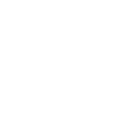

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def Zhang_Suen_thining(img):
    # get shape
    H, W, C = img.shape

    # prepare out image
    out = np.zeros((H, W), dtype=np.int)
    out[img[..., 0] > 0] = 1

    # inverse
    out = 1 - out

    while True:
        s1 = []
        s2 = []

        # step 1 ( rasta scan )
        for y in range(1, H-1):
            for x in range(1, W-1):
                
                # condition 1
                if out[y, x] > 0:
                    continue

                # condition 2
                f1 = 0
                if (out[y-1, x+1] - out[y-1, x]) == 1:
                    f1 += 1
                if (out[y, x+1] - out[y-1, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x+1] - out[y, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x] - out[y+1,x+1]) == 1:
                    f1 += 1
                if (out[y+1, x-1] - out[y+1, x]) == 1:
                    f1 += 1
                if (out[y, x-1] - out[y+1, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x-1] - out[y, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x] - out[y-1, x-1]) == 1:
                    f1 += 1

                if f1 != 1:
                    continue
                    
                # condition 3
                f2 = np.sum(out[y-1:y+2, x-1:x+2])
                if f2 < 2 or f2 > 6:
                    continue
                
                # condition 4
                if out[y-1, x] + out[y, x+1] + out[y+1, x] < 1:
                    continue

                # condition 5
                if out[y, x+1] + out[y+1, x] + out[y, x-1] < 1:
                    continue
                    
                s1.append([y, x])

        for v in s1:
            out[v[0], v[1]] = 1

        # step 2 ( rasta scan )
        for y in range(1, H-1):
            for x in range(1, W-1):
                
                # condition 1
                if out[y, x] > 0:
                    continue

                # condition 2
                f1 = 0
                if (out[y-1, x+1] - out[y-1, x]) == 1:
                    f1 += 1
                if (out[y, x+1] - out[y-1, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x+1] - out[y, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x] - out[y+1,x+1]) == 1:
                    f1 += 1
                if (out[y+1, x-1] - out[y+1, x]) == 1:
                    f1 += 1
                if (out[y, x-1] - out[y+1, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x-1] - out[y, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x] - out[y-1, x-1]) == 1:
                    f1 += 1

                if f1 != 1:
                    continue
                    
                # condition 3
                f2 = np.sum(out[y-1:y+2, x-1:x+2])
                if f2 < 2 or f2 > 6:
                    continue
                
                # condition 4
                if out[y-1, x] + out[y, x+1] + out[y, x-1] < 1:
                    continue

                # condition 5
                if out[y-1, x] + out[y+1, x] + out[y, x-1] < 1:
                    continue
                    
                s2.append([y, x])

        for v in s2:
            out[v[0], v[1]] = 1

        # if not any pixel is changed
        if len(s1) < 1 and len(s2) < 1:
            break

    out = 1 - out
    out = out.astype(np.uint8) * 255

    return out


# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# Zhang Suen thining
out = Zhang_Suen_thining(img)


# Save result
cv2.imwrite("out.png", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt


# get HOG step1
def HOG_step1(img):
     # Grayscale
     def BGR2GRAY(img):
          gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
          return gray

     # Magnitude and gradient
     def get_gradXY(gray):
          H, W = gray.shape

          # padding before grad
          gray = np.pad(gray, (1, 1), 'edge')

          # get grad x
          gx = gray[1:H+1, 2:] - gray[1:H+1, :W]
          # get grad y
          gy = gray[2:, 1:W+1] - gray[:H, 1:W+1]
          # replace 0 with 
          gx[gx == 0] = 1e-6

          return gx, gy

     # get magnitude and gradient
     def get_MagGrad(gx, gy):
          # get gradient maginitude
          magnitude = np.sqrt(gx ** 2 + gy ** 2)

          # get gradient angle
          gradient = np.arctan(gy / gx)

          gradient[gradient < 0] = np.pi / 2 + gradient[gradient < 0] + np.pi / 2

          return magnitude, gradient

     # Gradient histogram
     def quantization(gradient):
          # prepare quantization table
          gradient_quantized = np.zeros_like(gradient, dtype=np.int)

          # quantization base
          d = np.pi / 9

          # quantization
          for i in range(9):
               gradient_quantized[np.where((gradient >= d * i) & (gradient <= d * (i + 1)))] = i

          return gradient_quantized

     # 1. BGR -> Gray
     gray = BGR2GRAY(img)

     # 1. Gray -> Gradient x and y
     gx, gy = get_gradXY(gray)

     # 2. get gradient magnitude and angle
     magnitude, gradient = get_MagGrad(gx, gy)

     # 3. Quantization
     gradient_quantized = quantization(gradient)

     return magnitude, gradient_quantized


# Read image
img = cv2.imread("imori.jpg").astype(np.float32)

# get HOG step1
magnitude, gradient_quantized = HOG_step1(img)

# Write gradient magnitude to file
_magnitude = (magnitude / magnitude.max() * 255).astype(np.uint8)

cv2.imwrite("out_mag.jpg", _magnitude)

# Write gradient angle to file
H, W, C = img.shape
out = np.zeros((H, W, 3), dtype=np.uint8)

# define color
C = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [255, 0, 255], [0, 255, 255],
     [127, 127, 0], [127, 0, 127], [0, 127, 127]]

# draw color
for i in range(9):
     out[gradient_quantized == i] = C[i]


cv2.imwrite("out_gra.jpg", out)
cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()

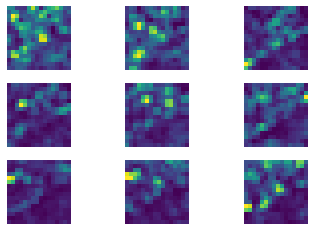

In [7]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# get HOG step2
def HOG_step2(img):
    # Grayscale
    def BGR2GRAY(img):
        gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
        return gray

    # Magnitude and gradient
    def get_gradXY(gray):
        H, W = gray.shape

        # padding before grad
        gray = np.pad(gray, (1, 1), 'edge')

        # get grad x
        gx = gray[1:H+1, 2:] - gray[1:H+1, :W]
        # get grad y
        gy = gray[2:, 1:W+1] - gray[:H, 1:W+1]
        # replace 0 with 
        gx[gx == 0] = 1e-6

        return gx, gy

    # get magnitude and gradient
    def get_MagGrad(gx, gy):
        # get gradient maginitude
        magnitude = np.sqrt(gx ** 2 + gy ** 2)

        # get gradient angle
        gradient = np.arctan(gy / gx)

        gradient[gradient < 0] = np.pi / 2 + gradient[gradient < 0] + np.pi / 2

        return magnitude, gradient

    # Gradient histogram
    def quantization(gradient):
        # prepare quantization table
        gradient_quantized = np.zeros_like(gradient, dtype=np.int)

        # quantization base
        d = np.pi / 9

        # quantization
        for i in range(9):
            gradient_quantized[np.where((gradient >= d * i) & (gradient <= d * (i + 1)))] = i

        return gradient_quantized

        
    # get gradient histogram
    def gradient_histogram(gradient_quantized, magnitude, N=8):
        # get shape
        H, W = magnitude.shape

        # get cell num
        cell_N_H = H // N
        cell_N_W = W // N
        histogram = np.zeros((cell_N_H, cell_N_W, 9), dtype=np.float32)

        # each pixel
        for y in range(cell_N_H):
            for x in range(cell_N_W):
                for j in range(N):
                    for i in range(N):
                        histogram[y, x, gradient_quantized[y * 4 + j, x * 4 + i]] += magnitude[y * 4 + j, x * 4 + i]

        return histogram

    # 1. BGR -> Gray
    gray = BGR2GRAY(img)

    # 1. Gray -> Gradient x and y
    gx, gy = get_gradXY(gray)

    # 2. get gradient magnitude and angle
    magnitude, gradient = get_MagGrad(gx, gy)

    # 3. Quantization
    gradient_quantized = quantization(gradient)

    # 4. Gradient histogram
    histogram = gradient_histogram(gradient_quantized, magnitude)

    return histogram


# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# get HOG step2
histogram = HOG_step2(img)
                
# write histogram to file
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(histogram[..., i])
    plt.axis('off')
    plt.xticks(color="None")
    plt.yticks(color="None")
plt.savefig("out.png")
plt.show()

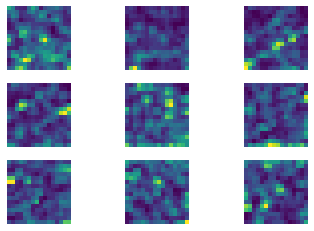

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# get HOG
def HOG(img):
    # Grayscale
    def BGR2GRAY(img):
        gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
        return gray

    # Magnitude and gradient
    def get_gradXY(gray):
        H, W = gray.shape

        # padding before grad
        gray = np.pad(gray, (1, 1), 'edge')

        # get grad x
        gx = gray[1:H+1, 2:] - gray[1:H+1, :W]
        # get grad y
        gy = gray[2:, 1:W+1] - gray[:H, 1:W+1]
        # replace 0 with 
        gx[gx == 0] = 1e-6

        return gx, gy

    # get magnitude and gradient
    def get_MagGrad(gx, gy):
        # get gradient maginitude
        magnitude = np.sqrt(gx ** 2 + gy ** 2)

        # get gradient angle
        gradient = np.arctan(gy / gx)

        gradient[gradient < 0] = np.pi / 2 + gradient[gradient < 0] + np.pi / 2

        return magnitude, gradient

    # Gradient histogram
    def quantization(gradient):
        # prepare quantization table
        gradient_quantized = np.zeros_like(gradient, dtype=np.int)

        # quantization base
        d = np.pi / 9

        # quantization
        for i in range(9):
            gradient_quantized[np.where((gradient >= d * i) & (gradient <= d * (i + 1)))] = i

        return gradient_quantized


    # get gradient histogram
    def gradient_histogram(gradient_quantized, magnitude, N=8):
        # get shape
        H, W = magnitude.shape

        # get cell num
        cell_N_H = H // N
        cell_N_W = W // N
        histogram = np.zeros((cell_N_H, cell_N_W, 9), dtype=np.float32)

        # each pixel
        for y in range(cell_N_H):
            for x in range(cell_N_W):
                for j in range(N):
                    for i in range(N):
                        histogram[y, x, gradient_quantized[y * 4 + j, x * 4 + i]] += magnitude[y * 4 + j, x * 4 + i]

        return histogram

		# histogram normalization
    def normalization(histogram, C=3, epsilon=1):
        cell_N_H, cell_N_W, _ = histogram.shape
        ## each histogram
        for y in range(cell_N_H):
    	    for x in range(cell_N_W):
       	    #for i in range(9):
                histogram[y, x] /= np.sqrt(np.sum(histogram[max(y - 1, 0) : min(y + 2, cell_N_H),
                                                            max(x - 1, 0) : min(x + 2, cell_N_W)] ** 2) + epsilon)

        return histogram

    # 1. BGR -> Gray
    gray = BGR2GRAY(img)

    # 1. Gray -> Gradient x and y
    gx, gy = get_gradXY(gray)

    # 2. get gradient magnitude and angle
    magnitude, gradient = get_MagGrad(gx, gy)

    # 3. Quantization
    gradient_quantized = quantization(gradient)

    # 4. Gradient histogram
    histogram = gradient_histogram(gradient_quantized, magnitude)
    
    # 5. Histogram normalization
    histogram = normalization(histogram)

    return histogram


# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# get HOG
histogram = HOG(img)
                
# Write result to file
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(histogram[..., i])
    plt.axis('off')
    plt.xticks(color="None")
    plt.yticks(color="None")
plt.savefig("out.png")
plt.show()

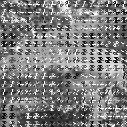

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# get HOG
def HOG(img):
    # Grayscale
    def BGR2GRAY(img):
        gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
        return gray

    # Magnitude and gradient
    def get_gradXY(gray):
        H, W = gray.shape

        # padding before grad
        gray = np.pad(gray, (1, 1), 'edge')

        # get grad x
        gx = gray[1:H+1, 2:] - gray[1:H+1, :W]
        # get grad y
        gy = gray[2:, 1:W+1] - gray[:H, 1:W+1]
        # replace 0 with 
        gx[gx == 0] = 1e-6

        return gx, gy

    # get magnitude and gradient
    def get_MagGrad(gx, gy):
        # get gradient maginitude
        magnitude = np.sqrt(gx ** 2 + gy ** 2)

        # get gradient angle
        gradient = np.arctan(gy / gx)

        gradient[gradient < 0] = np.pi / 2 + gradient[gradient < 0] + np.pi / 2

        return magnitude, gradient

    # Gradient histogram
    def quantization(gradient):
        # prepare quantization table
        gradient_quantized = np.zeros_like(gradient, dtype=np.int)

        # quantization base
        d = np.pi / 9

        # quantization
        for i in range(9):
            gradient_quantized[np.where((gradient >= d * i) & (gradient <= d * (i + 1)))] = i

        return gradient_quantized


    # get gradient histogram
    def gradient_histogram(gradient_quantized, magnitude, N=8):
        # get shape
        H, W = magnitude.shape

        # get cell num
        cell_N_H = H // N
        cell_N_W = W // N
        histogram = np.zeros((cell_N_H, cell_N_W, 9), dtype=np.float32)

        # each pixel
        for y in range(cell_N_H):
            for x in range(cell_N_W):
                for j in range(N):
                    for i in range(N):
                        histogram[y, x, gradient_quantized[y * 4 + j, x * 4 + i]] += magnitude[y * 4 + j, x * 4 + i]

        return histogram

		# histogram normalization
    def normalization(histogram, C=3, epsilon=1):
        cell_N_H, cell_N_W, _ = histogram.shape
        ## each histogram
        for y in range(cell_N_H):
    	    for x in range(cell_N_W):
       	    #for i in range(9):
                histogram[y, x] /= np.sqrt(np.sum(histogram[max(y - 1, 0) : min(y + 2, cell_N_H),
                                                            max(x - 1, 0) : min(x + 2, cell_N_W)] ** 2) + epsilon)

        return histogram

    # 1. BGR -> Gray
    gray = BGR2GRAY(img)

    # 1. Gray -> Gradient x and y
    gx, gy = get_gradXY(gray)

    # 2. get gradient magnitude and angle
    magnitude, gradient = get_MagGrad(gx, gy)

    # 3. Quantization
    gradient_quantized = quantization(gradient)

    # 4. Gradient histogram
    histogram = gradient_histogram(gradient_quantized, magnitude)
    
    # 5. Histogram normalization
    histogram = normalization(histogram)

    return histogram


# draw HOG
def draw_HOG(img, histogram):
    # Grayscale
    def BGR2GRAY(img):
        gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
        return gray

    def draw(gray, histogram, N=8):
        # get shape
        H, W = gray.shape
        cell_N_H, cell_N_W, _ = histogram.shape
        
        ## Draw
        out = gray[1 : H + 1, 1 : W + 1].copy().astype(np.uint8)

        for y in range(cell_N_H):
            for x in range(cell_N_W):
                cx = x * N + N // 2
                cy = y * N + N // 2
                x1 = cx + N // 2 - 1
                y1 = cy
                x2 = cx - N // 2 + 1
                y2 = cy
                
                h = histogram[y, x] / np.sum(histogram[y, x])
                h /= h.max()
        
                for c in range(9):
                    #angle = (20 * c + 10 - 90) / 180. * np.pi
                    # get angle
                    angle = (20 * c + 10) / 180. * np.pi
                    rx = int(np.sin(angle) * (x1 - cx) + np.cos(angle) * (y1 - cy) + cx)
                    ry = int(np.cos(angle) * (x1 - cx) - np.cos(angle) * (y1 - cy) + cy)
                    lx = int(np.sin(angle) * (x2 - cx) + np.cos(angle) * (y2 - cy) + cx)
                    ly = int(np.cos(angle) * (x2 - cx) - np.cos(angle) * (y2 - cy) + cy)

                    # color is HOG value
                    c = int(255. * h[c])

                    # draw line
                    cv2.line(out, (lx, ly), (rx, ry), (c, c, c), thickness=1)

        return out
    

    # get gray
    gray = BGR2GRAY(img)

    # draw HOG
    out = draw(gray, histogram)

    return out

# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# get HOG
histogram = HOG(img)

# draw HOG
out = draw_HOG(img, histogram)


# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

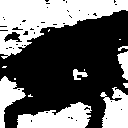

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def BGR2HSV(_img):
	img = _img.copy() / 255.

	hsv = np.zeros_like(img, dtype=np.float32)

	# get max and min
	max_v = np.max(img, axis=2).copy()
	min_v = np.min(img, axis=2).copy()
	min_arg = np.argmin(img, axis=2)

	# H
	hsv[..., 0][np.where(max_v == min_v)]= 0
	## if min == B
	ind = np.where(min_arg == 0)
	hsv[..., 0][ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
	## if min == R
	ind = np.where(min_arg == 2)
	hsv[..., 0][ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
	## if min == G
	ind = np.where(min_arg == 1)
	hsv[..., 0][ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
		
	# S
	hsv[..., 1] = max_v.copy() - min_v.copy()

	# V
	hsv[..., 2] = max_v.copy()
	
	return hsv

# make mask
def get_mask(hsv):
	mask = np.zeros_like(hsv[..., 0])
	#mask[np.where((hsv > 180) & (hsv[0] < 260))] = 255
	mask[np.logical_and((hsv[..., 0] > 180), (hsv[..., 0] < 260))] = 255
	return mask


# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# RGB > HSV
hsv = BGR2HSV(img)


# color tracking
mask = get_mask(hsv)

out = mask.astype(np.uint8)

# Save result
cv2.imwrite("out.png", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()